In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings('ignore')

# Task - 1
1. Load the dataset into a pandas data frame ( train 
and test).
2. Perform data inspection whether data is ready for 
time series analysis, if not then make data able to 
perform time series analysis.
3. Perform some visual inspections of the data. 
4. Complete the decomposition of data. Does it have 
all the components required for a Time-Series 
analysis

In [180]:
df=pd.read_csv('DS3_C1_S5_SuperstoreSales_Data_Hackathon.csv',index_col='Ship Date',parse_dates=True) 
df

,Row ID,Order ID,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Ship Date,,,,,,,,,,,,,,,
2016-11-11,1,CA-2016-152156,11-08-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-11,2,CA-2016-152156,11-08-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-18,4,US-2015-108966,10-11-2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-14,6,CA-2014-115812,06-09-2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-14,11,CA-2014-115812,06-09-2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-22,9963,CA-2015-168088,3/19/2015,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,383.4656,4,0.32,-67.6704
2016-12-10,9965,CA-2016-146374,12-05-2016,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,13.4000,1,0.00,6.4320
2015-09-09,9981,US-2015-151435,09-06-2015,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,85.9800,1,0.00,22.3548


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-11 to 2017-03-03
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row ID       2121 non-null   int64  
 1   Order ID     2121 non-null   object 
 2   Order Date   2121 non-null   object 
 3   Ship Mode    2121 non-null   object 
 4   Segment      2121 non-null   object 
 5   Country      2121 non-null   object 
 6   City         2121 non-null   object 
 7   State        2121 non-null   object 
 8   Postal Code  2121 non-null   int64  
 9   Region       2121 non-null   object 
 10  Category     2121 non-null   object 
 11  Sales        2121 non-null   float64
 12  Quantity     2121 non-null   int64  
 13  Discount     2121 non-null   float64
 14  Profit       2121 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 265.1+ KB


In [182]:
Sales=df['Sales']

In [183]:
Sales.head()

Ship Date
2016-11-11     261.9600
2016-11-11     731.9400
2015-10-18     957.5775
2014-06-14      48.8600
2014-06-14    1706.1840
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Ship Date'>

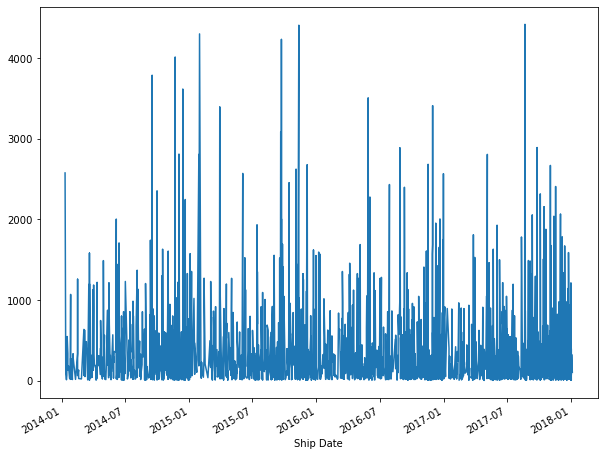

In [184]:
Sales.plot(figsize=(10,8))

In [185]:
sal=df.resample('W').mean()
sal

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Ship Date,,,,,,
2014-01-12,7568.000000,59880.000000,1325.274000,6.000000,0.300000,346.349100
2014-01-19,2824.666667,33983.500000,188.480500,3.666667,0.141667,15.161567
2014-01-26,5158.000000,64236.428571,231.461143,3.285714,0.128571,-5.710357
2014-02-02,4095.200000,57407.400000,168.173200,2.600000,0.070000,12.354280
2014-02-09,9267.000000,89031.000000,14.560000,2.000000,0.000000,5.532800
...,...,...,...,...,...,...
2017-12-10,6351.218750,51281.625000,343.085250,4.375000,0.165625,5.908891
2017-12-17,4135.833333,50931.458333,378.857958,3.958333,0.227083,-20.181362
2017-12-24,4741.473684,59810.526316,230.557316,3.578947,0.155263,2.504158


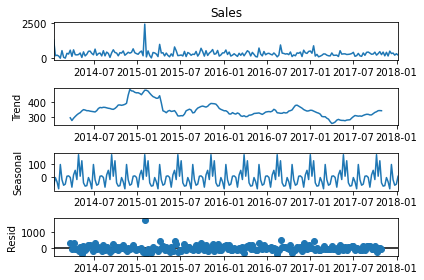

In [186]:
sd = seasonal_decompose(sal.Sales,freq=20).plot()

In [188]:
ind = int(np.round(len(sal)*0.7,0))
train=sal.Sales[:ind]
test=sal.Sales[ind:]

# Task 2

In [189]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf

In [190]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if pvalue < 0.05:
        msg = "pvalue={}. Data is stationary".format(pvalue)
    else:
        msg = "pvalue={}. Data is not stationary".format(pvalue)
    return msg

In [191]:
checkStationarity(sal.Sales)

'pvalue=4.557015818928744e-30. Data is stationary'

In [192]:
checkStationarity(train)

'pvalue=1.5793405202977328e-27. Data is stationary'

In [193]:
checkStationarity(test)

'pvalue=2.301571146093114e-13. Data is stationary'

<AxesSubplot:xlabel='Ship Date'>

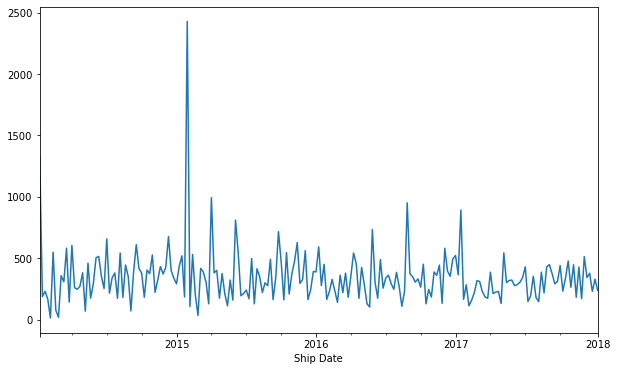

In [97]:
sal["Sales"].plot(figsize=(10,6))

In [194]:
sal_acf = acf(train, nlags=21)
sal_pacf = pacf(train, nlags=21)

Text(0.5, 1.0, 'Partial Auto Correlation')

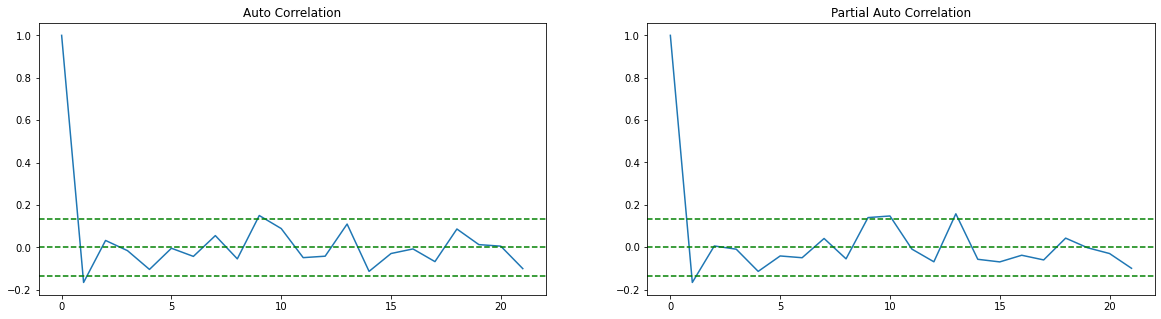

In [195]:
_,ax = plt.subplots(figsize=(20,5))

plt.subplot(121)
plt.plot(sal_acf)
plt.axhline(y=0,linestyle="--",color='green')
plt.axhline(y=-1.96/np.sqrt(len(sal.Sales)),linestyle="--",color='green')
plt.axhline(y=1.96/np.sqrt(len(sal.Sales)),linestyle="--",color='green')
plt.title("Auto Correlation")

# plot PACF (p)
plt.subplot(122)
plt.plot(sal_pacf)
plt.axhline(y=0,linestyle="--",color='green')
plt.axhline(y=-1.96/np.sqrt(len(sal.Sales)),linestyle="--",color='green')
plt.axhline(y=1.96/np.sqrt(len(sal.Sales)),linestyle="--",color='green')
plt.title("Partial Auto Correlation")

# Task 3

In [196]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm 

In [198]:
for p in range(1,3):
    for q in range(1,3):
        m1 =ARIMA(train, order=(p,0,q)).fit()
        print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  146
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1014.808
Date:                Fri, 29 Apr 2022   AIC                           2037.616
Time:                        12:16:48   BIC                           2049.550
Sample:                    01-12-2014   HQIC                          2042.465
                         - 10-23-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        357.8926     28.136     12.720      0.000     302.747     413.038
ar.L1         -0.2142      0.786     -0.273      0.785      -1.754       1.326
ma.L1          0.0336      0.801      0.042      0.9

In [199]:
m1 =ARIMA(train, order=(2,0,1)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  146
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1013.419
Date:                Fri, 29 Apr 2022   AIC                           2036.838
Time:                        12:19:16   BIC                           2051.756
Sample:                    01-12-2014   HQIC                          2042.899
                         - 10-23-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        357.6179     26.539     13.475      0.000     305.603     409.633
ar.L1         -1.1509      0.140     -8.230      0.000      -1.425      -0.877
ar.L2         -0.2058      0.136     -1.518      0.1

In [200]:
predictions=m1.predict(0,len(test)-1)

In [201]:
predictions

Ship Date
2014-01-12    357.617936
2014-01-19    185.042079
2014-01-26    356.471800
2014-02-02    416.647786
2014-02-09    360.916116
                 ...    
2015-02-22    383.726334
2015-03-01    321.055508
2015-03-08    477.657630
2015-03-15    295.415454
2015-03-22    401.756377
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

In [203]:
actual=[]; pred=[]

for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

In [204]:
len(actual),len(pred)

(63, 63)

In [205]:
df1=pd.DataFrame({'actual': actual, 'predicted':pred})
df1['err']=df1.actual-df1.predicted

In [206]:
df1

,actual,predicted,err
0,185.357571,357.617936,-172.260364
1,388.958385,185.042079,203.916306
2,362.146825,356.471800,5.675025
3,444.975333,416.647786,28.327548
4,133.753625,360.916116,-227.162491
...,...,...,...
58,343.085250,383.726334,-40.641084
59,378.857958,321.055508,57.802450
60,230.557316,477.657630,-247.100314
61,330.248667,295.415454,34.833213


Text(0.5, 1.0, 'ARMA model.order(p,q)=2,2')

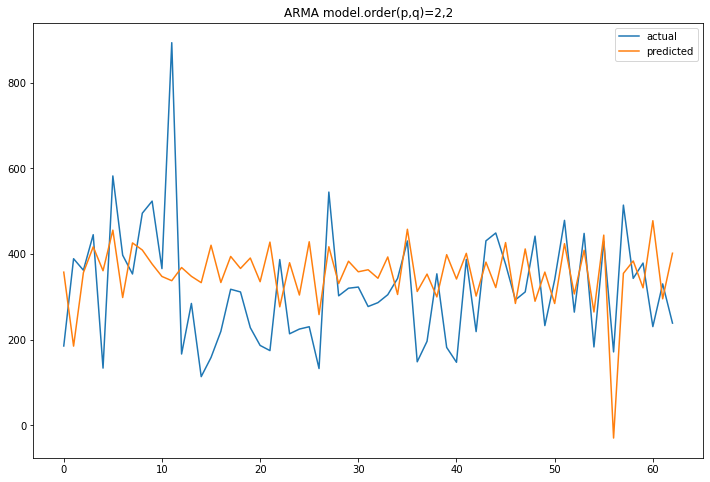

In [221]:
df1.actual.plot(figsize=(12,8),legend=True)
df1.predicted.plot(legend=True)
plt.title(msg)

In [207]:
pvalue=sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values

if pvalue < 0.05:
    print('Rejected H0.Bad model')
else:
    print('Good model')

Good model


In [208]:
from sklearn.metrics import mean_squared_error

In [209]:
# MSE
msg = "ARMA model.order(p,q)="+str(p) +','+str(q)
mse1=mean_squared_error(df1.actual,df1.predicted)

print(msg + "\ntRMSE={} \n\tRMSE={}".format(mse1,np.sqrt(mse1)))

ARMA model.order(p,q)=2,2
tRMSE=21015.235742514873 
	RMSE=144.96632623652596


# Task - 4

In [211]:
m2 =ARIMA(train, order=(2,0,1)).fit()
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  146
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1013.419
Date:                Fri, 29 Apr 2022   AIC                           2036.838
Time:                        12:22:15   BIC                           2051.756
Sample:                    01-12-2014   HQIC                          2042.899
                         - 10-23-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        357.6179     26.539     13.475      0.000     305.603     409.633
ar.L1         -1.1509      0.140     -8.230      0.000      -1.425      -0.877
ar.L2         -0.2058      0.136     -1.518      0.1

In [214]:
predictions1=m2.predict(0,len(test)-1)

In [215]:
actual=[]; pred=[]

for i in range(len(predictions1)):
    actual.append(test[i])
    pred.append(predictions1[i])

In [217]:
df2=pd.DataFrame({'actual': actual, 'predicted':pred})
df2['err']=df2.actual-df2.predicted

In [219]:
df2

,actual,predicted,err
0,185.357571,357.617936,-172.260364
1,388.958385,185.042079,203.916306
2,362.146825,356.471800,5.675025
3,444.975333,416.647786,28.327548
4,133.753625,360.916116,-227.162491
...,...,...,...
58,343.085250,383.726334,-40.641084
59,378.857958,321.055508,57.802450
60,230.557316,477.657630,-247.100314
61,330.248667,295.415454,34.833213


Text(0.5, 1.0, 'ARMA model.order(p,q)=2,2')

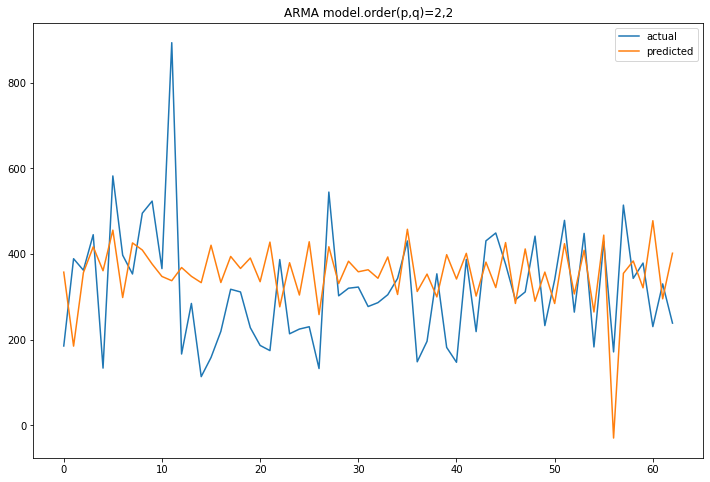

In [220]:
df2.actual.plot(figsize=(12,8),legend=True)
df2.predicted.plot(legend=True)
plt.title(msg)

# Task - 5

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [125]:
p=1; d=1; q=1
sfv=52

m3=SARIMAX(train.Sales,order=(p,d,q),seasonal_order=(p,d,q,sfv)).fit()

In [126]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  146
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood                -825.606
Date:                            Fri, 29 Apr 2022   AIC                           1661.212
Time:                                    01:18:55   BIC                           1674.936
Sample:                                01-12-2014   HQIC                          1666.782
                                     - 10-23-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1470      0.175     -0.838      0.402      -0.491       0.197
ma.L1         -0.9998      6.145     -0.163      0.871     -13.044      11.044
ar.S.L30       0.0281      0.113      0.249      0.803      -0.193       0.249
ma.S.L30      -0.9917      9.545     -0.104      0.917     -19.700      17.716
sigma2      6.831e+04   8.53e+05      0.080      0.936    -1.6e+06    1.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               220.61
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.71
Prob(H) (two-sided):                  0.13   Kurtosis:                         9.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
start=len(train)
end=len(train) + len(test)-1

#pramerter='level'indicates that the predictions are in the original format of the data (ie non-differnced data)

predictions=m3.predict(start,end)
print(predictions[0:5])

2016-10-30    366.320093
2016-11-06    363.210925
2016-11-13    329.845633
2016-11-20    232.075921
2016-11-27    597.797039
Freq: W-SUN, Name: predicted_mean, dtype: float64


In [128]:
len(test),len(predictions)

(63, 63)

In [129]:
actual=[];pred=[]
    
for i in range(len(predictions)):
    actual.append(test[i])
    pred.append(predictions[i])

df_res=pd.DataFrame({'actual':actual,'predicted':pred}) 
df_res['err']=df_res.actual-df_res.predicted

In [130]:
df_res

,actual,predicted,err
0,185.357571,366.320093,-180.962522
1,388.958385,363.210925,25.747460
2,362.146825,329.845633,32.301192
3,444.975333,232.075921,212.899412
4,133.753625,597.797039,-464.043414
...,...,...,...
58,343.085250,221.039289,122.045961
59,378.857958,706.577368,-327.719409
60,230.557316,278.851567,-48.294252
61,330.248667,350.524575,-20.275908


In [131]:
# MSE and RMSE
msg="SARIMA model. order(p,d,q)=" +str(p) +","+str(d)+","+str(q) + ":Seasonal value =" + str(sfv)
mse1=mean_squared_error(df_res.actual,df_res.predicted)



print(msg + "\n\tMSE= {}\n\tRMSE={}\n\tBIC={}".format(mse1,np.sqrt(mse1),m3.aic,m3.bic))

SARIMA model. order(p,d,q)=1,1,1:Seasonal value =30
	MSE= 30117.200392592265
	RMSE=173.5430793566608
	BIC=1661.2117067510303


Text(0.5, 1.0, 'SARIMA model. order(p,d,q)=1,1,1:Seasonal value =30')

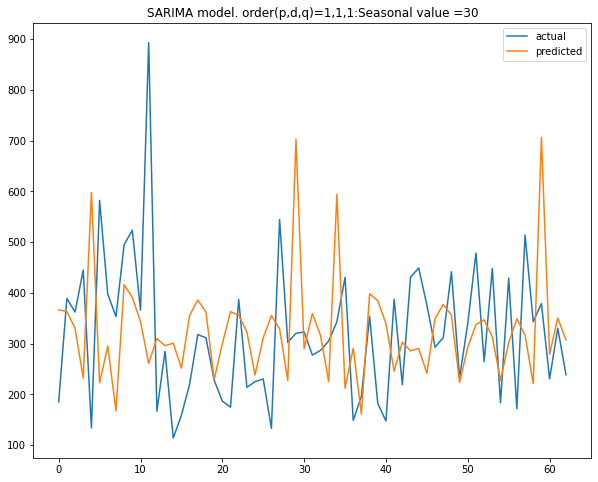

In [132]:
#Plot the actual and predicted 'Aplliances' values
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)

In [133]:
sal.columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [134]:
cols=list(sal.columns)
cols.remove('Sales')
print(cols)

['Row ID', 'Postal Code', 'Quantity', 'Discount', 'Profit']


In [135]:
exog_train = train[cols]
exog_test = test[cols]

In [136]:
 m1_smax = SARIMAX(train.Sales,order=(p,d,q),seasonal_order=(p,d,q,sfv), exog = exog_train.values).fit()

In [137]:
#forecast on test data
start=len(train)
end=len(train) + len(test)-1
predictions_smax=m1_smax.predict(start ,end, exog= exog_test.values)

In [138]:
predictions_smax[0:5]

2016-10-30    266.219929
2016-11-06    551.869372
2016-11-13    358.466564
2016-11-20    287.325701
2016-11-27    329.024135
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [139]:
#plot the actual and predicted data 

# MSE and RMSE
msg="SARIMA model. order(p,d,q)=" +str(p) + " , "+str(d)+","+str(q) + ":Seasonal value =" + str(sfv)
mse3=mean_squared_error(test.Sales,predictions_smax)



print(msg + "\n\tMSE= {}\n\tRMSE={}\n\tBIC={}".format(mse3,np. sqrt(mse2),m1_smax.aic,m1_smax.bic))

SARIMA model. order(p,d,q)=1 , 1,1:Seasonal value =30
	MSE= 42409.14146444207
	RMSE=141.2913174608575
	BIC=1656.4179026912425


Text(0.5, 1.0, 'SARIMA model. order(p,d,q)=1 , 1,1:Seasonal value =30')

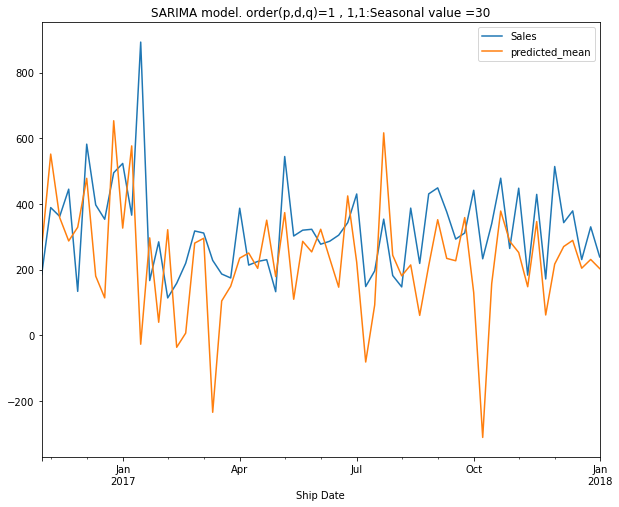

In [140]:
#error caluction
test.Sales.plot(figsize=(10,8),legend=True)
predictions_smax.plot(legend=True)
plt.title(msg)

# Task - 6

In [141]:
print("ARMA RMSE={},ARIMAX={},SARIMAX={}" .format(mse1,mse2,mse3))

ARMA RMSE=30117.200392592265,ARIMAX=19963.236389824815,SARIMAX=42409.14146444207
